In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#all_drop_exp.csvを読み込む
df_all_drop_exp = pd.read_csv('all_drop_exp.csv')
df_all_drop_exp

,Unnamed: 0,d1,d2,d3,d4,d5,w1,w2,w3,w4,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,0,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,...,29,21,10,6,3,1.6111,3.1556,3.7000,3.6667,3.5000
1,2,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,...,18,16,18,15,4,2.4667,2.4667,2.7333,2.6222,3.4222
2,3,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,...,28,16,17,11,4,2.2778,3.3778,3.9000,3.2889,3.7889
3,4,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,...,23,24,24,23,5,1.4444,4.4111,4.5778,4.1778,4.6889
4,5,4.9113,1.4880,3.0357,4.70687,6.26354,26.34567,23.30003,23.58674,17.89807,...,16,11,22,22,3,2.3556,3.4556,3.3111,2.5222,3.9778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,797,8.5748,-1.1702,4.7669,4.87733,7.84963,27.71802,19.01448,16.56406,16.81861,...,30,14,14,10,5,2.3111,3.1778,3.8667,3.3556,4.0000
680,798,10.2154,-1.1652,5.1767,2.77794,4.07748,21.64954,14.42384,14.39132,14.72991,...,36,13,21,29,2,2.9667,2.8222,2.7556,2.8667,2.8778
681,800,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,16.04473,...,33,18,24,10,4,2.4667,4.0556,4.2778,3.7778,4.0333
682,802,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,18.43385,...,28,26,17,6,4,1.8444,4.6111,4.2444,4.0222,4.3333


In [22]:
df_all_drop_s = df_all_drop_exp[['none_s', 'image_s','announce_s', 'image_sound_s']]
new_column_names = {'none_s': '提示なし','image_s': '画像のみ', 'announce_s': '音声のみ','image_sound_s': '画像+報知音', 'image_announce_s': '画像+音声'}

df_all_drop_s = df_all_drop_s.rename(columns=new_column_names)
#df_all_drop_sに関して，'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の最大値を持つカラム名をカラムとして追加
df_all_drop_s_max = df_all_drop_s.idxmax(axis=1)
df_all_drop_s_max.describe()

count      684
unique       4
top       音声のみ
freq       334
dtype: object

In [23]:
#df_all_drop_s_maxの要素の個数をカウント
df_all_drop_s_max_count = df_all_drop_s_max.value_counts()
df_all_drop_s_max_count

音声のみ      334
画像+報知音    166
画像のみ      162
提示なし       22
Name: count, dtype: int64

In [24]:
#df_all_drop_s_maxをone-hotエンコーディング
df_all_drop_s_max_one_hot = pd.get_dummies(df_all_drop_s_max).astype(int)
df_all_drop_s_max_one_hot

,提示なし,画像+報知音,画像のみ,音声のみ
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
679,0,0,0,1
680,1,0,0,0
681,0,0,0,1
682,0,0,1,0


In [25]:
df_all_drop_exp.columns

Index(['Unnamed: 0', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s'],
      dtype='object')

In [26]:
# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']
# target = ['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']  

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
y = df_all_drop_s_max_one_hot

In [27]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

,提示なし,画像+報知音,画像のみ,音声のみ
439,0,0,0,1
257,0,1,0,0
558,0,0,0,1
587,0,0,0,1
18,0,0,1,0
...,...,...,...,...
71,0,1,0,0
106,1,0,0,0
270,0,1,0,0
435,0,0,0,1


In [29]:








# 特徴量の標準化を含むパイプラインの構築
scaler = StandardScaler()
clf = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('classifier', clf)
])

# モデルのトレーニング
pipeline.fit(X_train, y_train)

# 予測と評価
y_pred = pipeline.predict(X_test)

# # y_test と y_pred を再度エンコード解除して比較
# y_test_labels = encoder.inverse_transform(y_test)
# y_pred_labels = encoder.inverse_transform(y_pred)

# print(classification_report(y_test_labels, y_pred_labels))
# print('Accuracy:', accuracy_score(y_test_labels, y_pred_labels))

print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        32
           3       0.56      0.38      0.46        73

   micro avg       0.54      0.20      0.30       137
   macro avg       0.14      0.10      0.11       137
weighted avg       0.30      0.20      0.24       137
 samples avg       0.20      0.20      0.20       137

Accuracy: 0.20437956204379562


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


参考文献　機械学習：https://qiita.com/hikaru_/items/3d64af35769235471d9c

In [30]:
# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']
# target = ['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']  

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

#ここから学習用データとテスト用データに分ける。random_stateは乱数を固定
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [31]:
df_all_drop_s_max

0      音声のみ
1      音声のみ
2      音声のみ
3      音声のみ
4      画像のみ
       ... 
679    音声のみ
680    提示なし
681    音声のみ
682    画像のみ
683    音声のみ
Length: 684, dtype: object

In [32]:
# # k-近傍法（k-NN）
# from sklearn.neighbors import KNeighborsClassifier

# #k-NNインスタンス。今回は3個で多数決。3の値を変更して色々試すと〇
# model = KNeighborsClassifier(n_neighbors=3)
# #学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
# model.fit(X_train, y_train)

# # .scoreで正解率を算出。
# print("train score:",model.score(X_train,y_train))
# print("test score:",model.score(X_test,y_test))

In [33]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

# 決定木インスタンス(木の深さ3)
model = DecisionTreeClassifier(max_depth=3)
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.530214424951267
test score: 0.4853801169590643


In [34]:
# サポートベクターマシン（SVM）
from sklearn.svm import LinearSVC

# SVMインスタンス
model = LinearSVC()
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.14814814814814814
test score: 0.12280701754385964


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [35]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# # ターゲットを数値ラベルに変換
# label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(max_iter=10000)

#グリッドサーチ
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')






/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 0.01}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train score: 0.48080438756855576
test score: 0.48175182481751827
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         5
      画像+報知音       0.15      0.07      0.10        29
        画像のみ       0.14      0.03      0.06        29
        音声のみ       0.54      0.85      0.66        74

    accuracy                           0.48       137
   macro avg       0.21      0.24      0.20       137
weighted avg       0.35      0.48      0.39       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


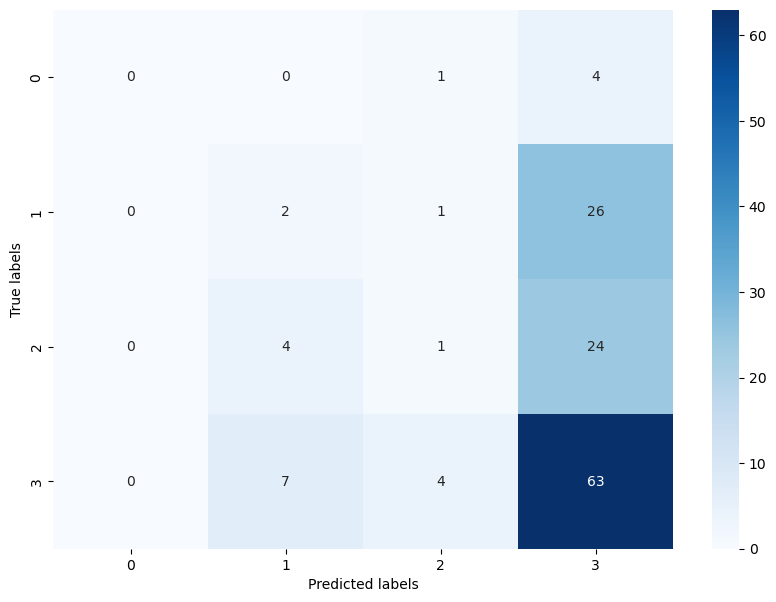

In [36]:
#最適なパラメータを使ってモデルを再構築
model = LinearSVC(C=0.001, max_iter=10000)
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm =confusion_matrix(y_test, y_pred)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



# ヒートマップの描画
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# #特徴量の重要度
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# plt.figure(figsize=(10, 7))
# plt.barh(range(len(importances)), importances[indices], align='center')
# plt.yticks(range(len(importances)), np.array(features)[indices])
# plt.show()

# # 特徴量の重要度を表示
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# for i in range(len(importances)):
#     print(f'{features[i]}: {importances[i]}')
    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


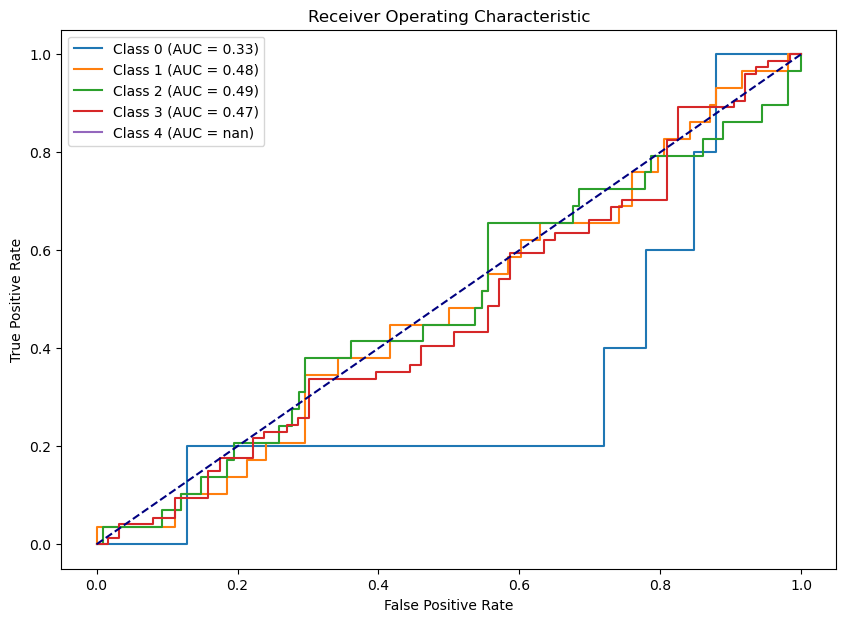

In [48]:
#AUC曲線
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.preprocessing import LabelEncoder

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# ターゲットをone-hotエンコーディング
Y = label_binarize(Y, classes=[0, 1, 2, 3, 4])
n_classes = Y.shape[1]

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(C=0.001, max_iter=10000)

# OneVsRestClassifierで多クラス分類
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# ROC曲線を描画
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# # 特徴量の重要度を表示
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# for i in range(len(importances)):
#     print(f'{features[i]}: {importances[i]}')

In [49]:
#xgboostを使用
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# モデルの構築
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 正解率の算出
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#ラベルのエンコードを元に戻す
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

#各ラベルの値を確認
print(label_encoder.classes_)


Accuracy: 0.40145985401459855
[[ 0  0  2  3]
 [ 0  2  4 23]
 [ 0  6  7 16]
 [ 1 15 12 46]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.09      0.07      0.08        29
           2       0.28      0.24      0.26        29
           3       0.52      0.62      0.57        74

    accuracy                           0.40       137
   macro avg       0.22      0.23      0.23       137
weighted avg       0.36      0.40      0.38       137

['提示なし' '画像+報知音' '画像のみ' '音声のみ']


In [50]:
#パラメータの調整
from sklearn.model_selection import GridSearchCV

# ハイパーパラメータの設定
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# グリッドサーチ
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')

#最適なパラメータを使ってモデルを再構築
model = xgb.XGBClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 正解率の算出
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=label_encoder.classes_))


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.49635036496350365
[[ 0  0  1  4]
 [ 0  0  1 28]
 [ 0  0  3 26]
 [ 0  3  6 65]]
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         5
      画像+報知音       0.00      0.00      0.00        29
        画像のみ       0.27      0.10      0.15        29
        音声のみ       0.53      0.88      0.66        74

    accuracy                           0.50       137
   macro avg       0.20      0.25      0.20       137
weighted avg       0.34      0.50      0.39       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=label_encoder.classes_))


[[ 0  0  1  4]
 [ 0  0  1 28]
 [ 0  0  3 26]
 [ 0  3  6 65]]
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         5
      画像+報知音       0.00      0.00      0.00        29
        画像のみ       0.27      0.10      0.15        29
        音声のみ       0.53      0.88      0.66        74

    accuracy                           0.50       137
   macro avg       0.20      0.25      0.20       137
weighted avg       0.34      0.50      0.39       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.dra

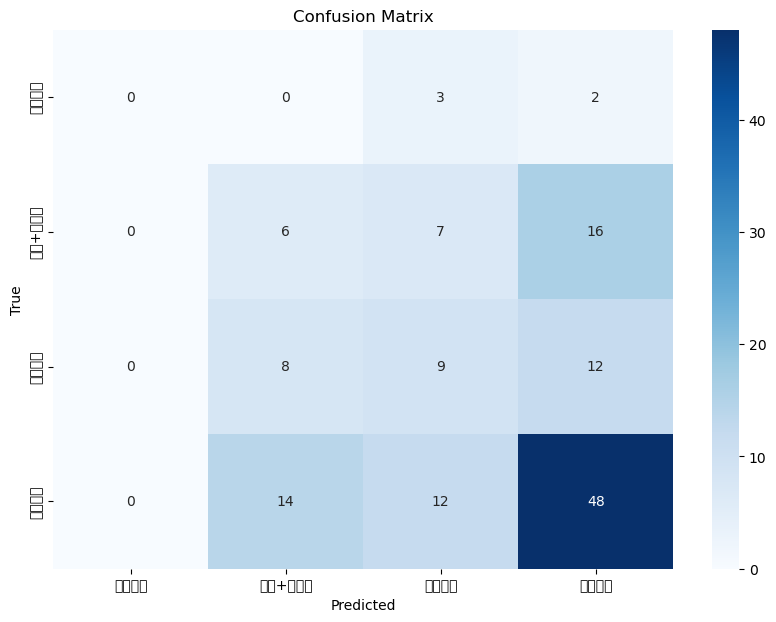

In [52]:

# 混同行列のプロット
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [53]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# # ターゲットを数値ラベルに変換
# label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(max_iter=10000)

#グリッドサーチ
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')




/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 0.01}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


参考文献　グリッドサーチ：https://qiita.com/WealthyFirst/items/c81f7cea72a44a7bfd3a

In [54]:
# tuned_parameters = [
#     {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#     {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
#     ]
# score = 'f1'
# clf = GridSearchCV(
#     SVC(), # 識別器
#     tuned_parameters, # 最適化したいパラメータセット 
#     cv=5, # 交差検定の回数
#     scoring='%s_weighted' % score ) # モデルの評価関数の指定

In [55]:
# クロスバリデーションでモデルの評価
scores = cross_val_score(model, X_train, y_train, cv=5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

# 最終的なモデルの学習
model.fit(X_train, y_train)

# 訓練データとテストデータでのスコアを表示
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

Cross-validation scores: [0.41818182 0.46363636 0.48623853 0.4587156  0.4587156 ]
Average cross-validation score: 0.4570975813177648
train score: 0.48628884826325414
test score: 0.5036496350364964


In [56]:
# !pip install tensorflow

In [57]:
X_train.shape[1]

17

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルの訓練
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2951 - loss: 1.5799 - val_accuracy: 0.3727 - val_loss: 1.4691
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4188 - loss: 1.4441 - val_accuracy: 0.4364 - val_loss: 1.3688
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4634 - loss: 1.2977 - val_accuracy: 0.4636 - val_loss: 1.3002
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.4814 - loss: 1.2155 - val_accuracy: 0.4636 - val_loss: 1.2664
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.4802 - loss: 1.1588 - val_accuracy: 0.4364 - val_loss: 1.2470
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.4680 - loss: 1.1347 - val_accuracy: 0.4273 - val_loss: 1.2429
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.5109 - loss: 1.0905 - val_accuracy: 0.4364 - val_loss: 1.2449
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.4831 - loss: 1.1117 - val_accuracy: 0.4455 - val_loss: 

Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2280 - loss: 1.8523 - val_accuracy: 0.2636 - val_loss: 1.6235
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.3006 - loss: 1.5638 - val_accuracy: 0.3000 - val_loss: 1.4773
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.3764 - loss: 1.3856 - val_accuracy: 0.3636 - val_loss: 1.3895
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.4480 - loss: 1.2822 - val_accuracy: 0.3909 - val_loss: 1.3388
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.4884 - loss: 1.2345 - val_accuracy: 0.4545 - val_loss: 1.3085
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.4651 - loss: 1.2103 - val_accuracy: 0.4545 - val_loss: 1.2884
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.5126 - loss: 1.1503 - val_accuracy: 0.4455 - val_loss: 1.2764
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.4807 - loss: 1.1705 - val_accuracy: 0.4455 -

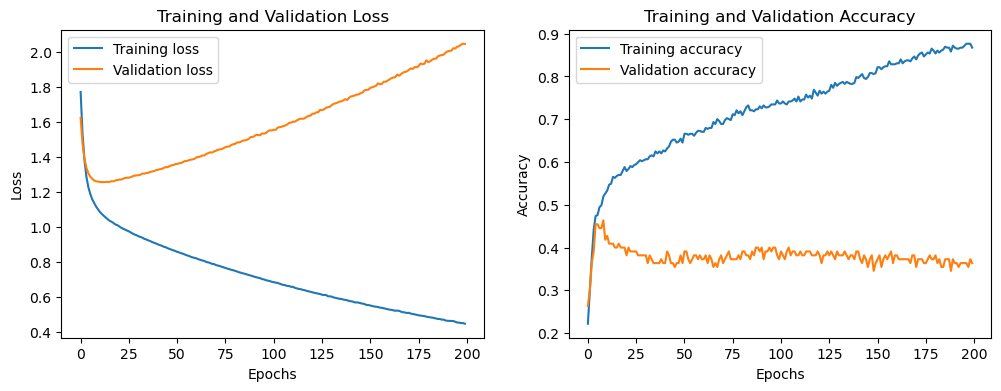

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 訓練パラメータ
epochs = 200
batch_size = 32

# モデルの訓練
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 学習過程のプロット
# 訓練と検証の損失をプロット
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# 訓練と検証の精度をプロット
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3818 - loss: 1.4566 - val_accuracy: 0.3523 - val_loss: 1.3639
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4258 - loss: 1.3998 - val_accuracy: 0.4205 - val_loss: 1.3142
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4173 - loss: 1.3122 - val_accuracy: 0.4886 - val_loss: 1.2945
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4989 - loss: 1.2564 - val_accuracy: 0.4773 - val_loss: 1.2858
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4753 - loss: 1.2063 - val_accuracy: 0.5000 - val_loss: 1.2794
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 1.1816 - val_accuracy: 0.5000 - val_loss: 1.2755
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4906 - loss: 1.1646 - val_accuracy: 0.4886 - val_loss: 1.2731
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4871 - loss: 1.1583 - val_accuracy: 0.5000 - val_loss: 1.2

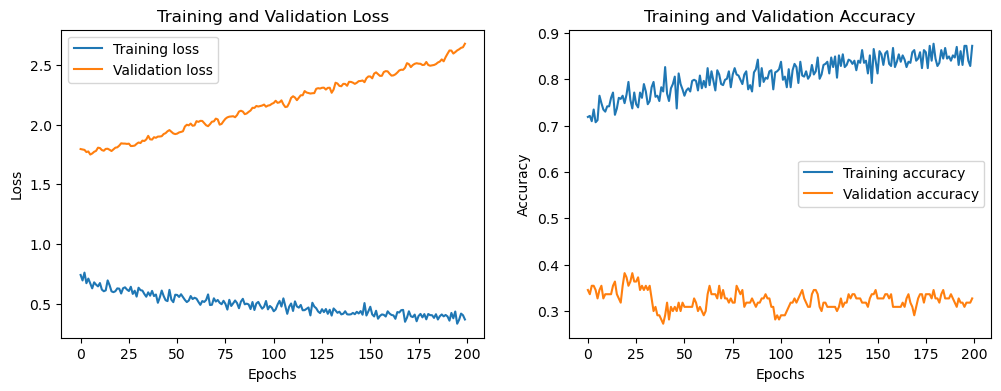

In [60]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 交差検証の設定
fold_num = 5
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X_train, y_train):
    # モデルの定義
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))

    # モデルのコンパイル
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルの訓練
    history = model.fit(X_train[train], y_train[train], epochs=200, batch_size=32, validation_split=0.2, verbose=1)

    # 評価
    scores = model.evaluate(X_train[test], y_train[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# モデルの最終訓練
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 学習過程のプロット
plt.figure(figsize=(12, 4))

# 訓練と検証の損失をプロット
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# 訓練と検証の精度をプロット
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.3540 - loss: 2.1753
Test loss: 2.155301332473755
Test accuracy: 0.37956205010414124


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         5
      画像+報知音       0.14      0.14      0.14        29
        画像のみ       0.14      0.10      0.12        29
        音声のみ       0.53      0.61      0.57        74

    accuracy                           0.38       137
   macro avg       0.20      0.21      0.21       137
weighted avg       0.34      0.38      0.36       137



/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.dra

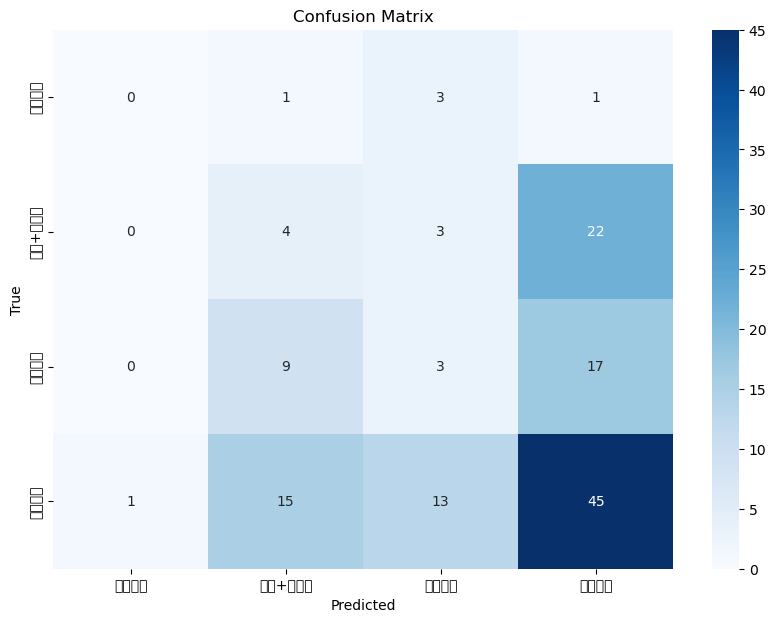

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 予測を実行
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# 混同行列の生成
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 各クラスごとの精度を含むレポートの表示
class_report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(class_report)

# 混同行列のプロット
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [62]:
#class_reportをファイルに出力
with open('class_report.txt', 'w') as f:
    f.write(class_report)



In [47]:
# !pip install xgboost

In [19]:
# #class_reportをエクセルファイルに出力
# import openpyxl

# # ワークブックを作成
# wb = openpyxl.Workbook()
# ws = wb.active
# ws.title = 'classification_report'

# # classification_reportの内容をセルに書き込む
# for i, line in enumerate(class_report.split('\n')):
#     for j, value in enumerate(line.split()):
#         ws.cell(row=i+1, column=j+1, value=value)

# # ファイルを保存
# wb.save('classification_report_exclude_imageanounce.xlsx')

# # ワークブックを閉じる
# wb.close()
